## 1-gram (unigram)
Consider single tokens independently 

Character: t, Probability: 0.0351
Character: h, Probability: 0.0351
Character: i, Probability: 0.1053
Character: s, Probability: 0.1053
Character:  , Probability: 0.1930
Character: a, Probability: 0.0702
Character: m, Probability: 0.0877
Character: p, Probability: 0.0526
Character: l, Probability: 0.0702
Character: e, Probability: 0.0877
Character: x, Probability: 0.0175
Character: o, Probability: 0.0351
Character: f, Probability: 0.0175
Character: 1, Probability: 0.0175
Character: -, Probability: 0.0175
Character: g, Probability: 0.0175
Character: r, Probability: 0.0175
Character: d, Probability: 0.0175
Generated Text: o  im rl a


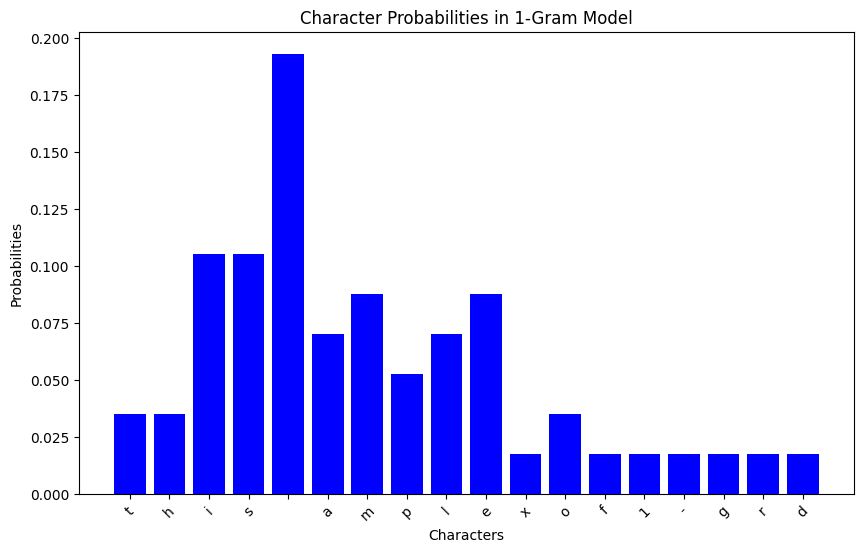

In [3]:
import random
from collections import Counter
import matplotlib.pyplot as plt

def train_1gram_model(text):
    # Tokenize the text by splitting into characters
    tokens = list(text)
    
    # Count the occurrences of each token
    token_counts = Counter(tokens)
    
    # Calculate the total number of tokens
    total_tokens = sum(token_counts.values())
    
    # Calculate the probability of each token
    token_probabilities = {token: count / total_tokens for token, count in token_counts.items()}
    
    return token_probabilities

def sample(model, num_chars):
    tokens = list(model.keys())
    probabilities = list(model.values())
    
    generated_text = []
    for _ in range(num_chars):
        generated_text.append(random.choices(tokens, probabilities)[0])
    
    return ''.join(generated_text)

def visualize_probabilities(model):
    tokens = list(model.keys())
    probabilities = list(model.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(tokens, probabilities, color='blue')
    plt.xlabel('Characters')
    plt.ylabel('Probabilities')
    plt.title('Character Probabilities in 1-Gram Model')
    plt.xticks(rotation=45)
    plt.show()

def main():
    text = "this is a simple example of a 1-gram model this is simple"
    model = train_1gram_model(text)
    
    for token, probability in model.items():
        print(f"Character: {token}, Probability: {probability:.4f}")
    
    generated_text = sample(model, 10)
    print(f"Generated Text: {generated_text}")
    
    visualize_probabilities(model)

if __name__ == "__main__":
    main()

## 2-gram (bigram)
Consider paris of consecutive tokens

In [ ]:
import random
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

def train_2gram_model(text):
    # Tokenize the text by splitting into characters
    tokens = list(text)
    
    # Create 2-grams from the tokens
    ngrams = [''.join(tokens[i:i+2]) for i in range(len(tokens)-1)]
    
    # Count the occurrences of each 2-gram
    ngram_counts = Counter(ngrams)
    
    # Calculate the total number of 2-grams
    total_ngrams = sum(ngram_counts.values())
    
    # Calculate the probability of each 2-gram
    ngram_probabilities = {ngram: count / total_ngrams for ngram, count in ngram_counts.items()}
    
    return ngram_probabilities

def sample(model, num_chars):
    ngrams = list(model.keys())
    probabilities = list(model.values())
    
    generated_text = []
    # Start with a random 2-gram
    current_ngram = random.choices(ngrams, probabilities)[0]
    generated_text.append(current_ngram)
    
    for _ in range(num_chars - 2):
        # Get the last character of the current n-gram
        last_char = current_ngram[-1]
        # Filter n-grams that start with the last character
        filtered_ngrams = [ngram for ngram in ngrams if ngram.startswith(last_char)]
        filtered_probabilities = [model[ngram] for ngram in filtered_ngrams]
        
        if filtered_ngrams:
            # Choose the next n-gram based on the filtered probabilities
            next_ngram = random.choices(filtered_ngrams, filtered_probabilities)[0]
            generated_text.append(next_ngram[-1])
            current_ngram = next_ngram
        else:
            # If no matching n-gram is found, start with a random 2-gram
            current_ngram = random.choices(ngrams, probabilities)[0]
            generated_text.append(current_ngram)
    
    return ''.join(generated_text)

def visualize_probabilities(model):
    ngrams = list(model.keys())
    probabilities = list(model.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, probabilities, color='blue')
    plt.xlabel('2-Grams')
    plt.ylabel('Probabilities')
    plt.title('2-Gram Probabilities in 2-Gram Model')
    plt.xticks(rotation=45)
    plt.show()

def main():
    text = "this is a simple example of a 2-gram model this is simple"
    model = train_2gram_model(text)
    
    # for ngram, probability in model.items():
    #     print(f"2-Gram: {ngram}, Probability: {probability:.4f}")
    
    generated_text = sample(model, 10)
    print(f"Generated Text: {generated_text}")
    
    visualize_probabilities(model)

if __name__ == "__main__":
    main()

## n-gram
Consider sequences of n consecutive tokens, where n can be any positive integer